Note: This takes ~2hrs to run so I have no idea whether it work :)

In [8]:
import numpy as np
from random import randint, choices
import matplotlib.pyplot as plt
from copy import deepcopy

In [9]:
image_dimensions = {"height": 200, "width": 200}
no_shapes = 3
shape_radius = 20
noise_level = 50 # larger -> less noise

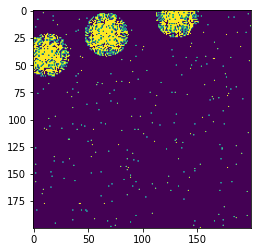

In [10]:
image = np.zeros((image_dimensions["height"], image_dimensions["width"]))

shapes = []
for i in range(no_shapes):
  centre = (randint(0, image_dimensions["width"]-1), randint(0, image_dimensions["height"]-1))
  shapes.append([centre, shape_radius])

for y in range(len(image)):
  for x in range(len(image[y])):
    for shape in shapes:
      distance = ((y - shape[0][1])**2 + (x - shape[0][0])**2)**0.5
      if distance <= shape[1] and randint(1, int(noise_level/(distance+1))) != 1 or randint(1, noise_level*10) == 1:
        image[y,x] = 1

imgplot = plt.imshow(image)

In [18]:
def agglomerative_clustering(image, centres):

  points = []

  for y in range(len(image)):
    for x in range(len(image[y])):
      if image[y,x] == 1:
        points.append((y, x))

  distance_matrix = []
  for i in range(len(points)):
    distance_matrix.append([((points[i][0] - points[j][0])**2 + (points[i][1] - points[j][1])**2)**0.5 for j in range(len(points))])  # inronically not a matrix
  
  clusters = [[point_index] for point_index in range(len(points))]

  cluster_history = []

  while len(clusters) > 1:

    best_dist = 1e9  # arbitrary large number
    best_indices = [0, 0]
    for i in range(len(clusters)):
      for j in range(len(clusters)):
        if i != j:
          dists = []
          for point_1 in clusters[i]:
            for point_2 in clusters[j]:
              dists.append(distance_matrix[point_1][point_2])
          dist = max(dists)
          if best_dist > dist:
            best_dist = distance
            best_indices = [i, j]
    
    clusters[i] = clusters[i] + clusters[j]
    del clusters[j]

    cluster_history.append(deepcopy(clusters))

  clusters = cluster_history[-centres]  # any more than the actual number of objects *should* be dumped in noise

  centres = []
  for cluster in clusters:
    sum = [0, 0]
    total = 0

    for i in cluster:
      sum[0], sum[1] = points[i][0], points[i][1]
      total += 1

    centres.append((sum[0]/total, sum[1]/total))

  for i, cluster in enumerate(clusters):
    for j in cluster:
      points[j] = [points[j], i]

  loss = 0
  for point in points:
    distances = np.array([((point[0][0] - centre[0])**2 + (point[0][1] - centre[1])**2)**0.5 for centre in centres])
    loss += min(distances)

  return points, centres, loss

In [ ]:
print(agglomerative_clustering(image, 5))